In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv('bikes_train.csv') # , index_col=0 to use the datetime column as the DataFrame index
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.shape

(10886, 12)

In [4]:
data.isnull().values.any()

False

In [5]:
data.dropna()
data.shape

(10886, 12)

In [6]:
def transform_data(data):
    data.datetime = data.datetime.apply(pd.to_datetime)
    data['month'] = data.datetime.apply(lambda x : x.month)
    data['hour'] = data.datetime.apply(lambda x : x.hour)
    data['day'] = data.datetime.apply(lambda x : x.timetuple().tm_yday)
    data['dayofweek'] = data.datetime.apply(lambda x : x.isoweekday())
    data.head()
    
transform_data(data)

In [7]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data)

In [8]:
train_data.shape

(8164, 16)

In [9]:
test_data.shape

(2722, 16)

In [10]:
fit_columns = ['day', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'hour', 'dayofweek']

In [11]:
model = Pipeline([#('scaler', Normalizer()),
                  ('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
model_result = model.fit(train_data[fit_columns], train_data[["count"]])

In [12]:
test_predictions = model.predict(test_data[fit_columns])
test_predictions

array([[  92.74113009],
       [ 310.58076482],
       [ 282.5618071 ],
       ..., 
       [  33.53932947],
       [ 172.08481741],
       [  32.29911987]])

In [13]:
flattened_predictions = np.ravel(test_predictions)

In [14]:
test_data["prediction"] = flattened_predictions
test_data.head(2)

D:\lib\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayofweek,prediction
10650,2012-12-10 04:00:00,4,0,1,2,15.58,19.695,94,7.0015,3,9,12,12,4,345,1,92.741130
4209,2011-10-07 10:00:00,4,0,1,1,21.32,25.000,68,6.0032,48,126,174,10,10,280,5,310.580765


In [15]:
print("The mean square error is %d" % np.mean((test_data["prediction"] - test_data["count"]) ** 2))

The mean square error is 13783


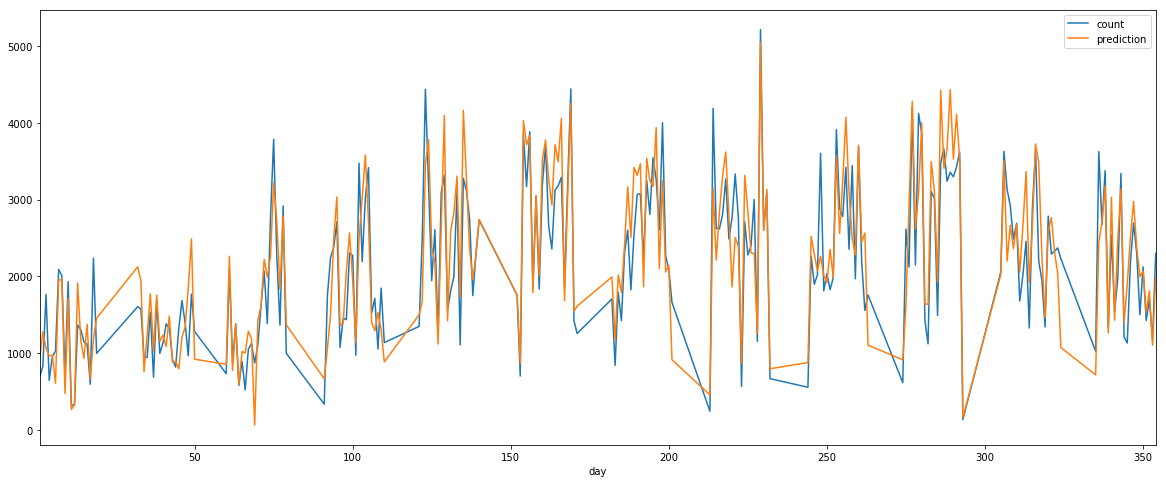

In [16]:
test_data[["day", "count", "prediction"]].groupby("day").aggregate(np.sum).plot(figsize=(20, 8))

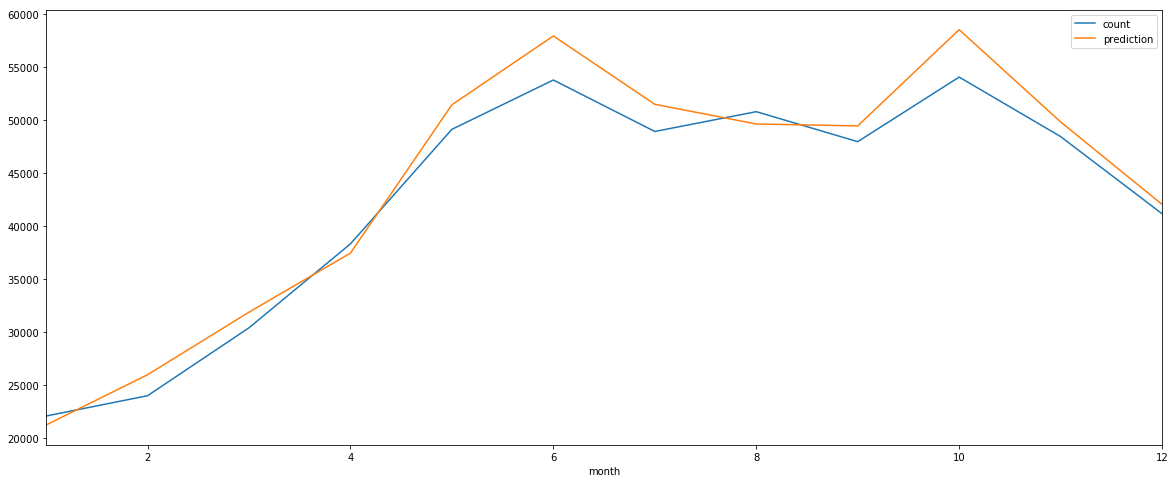

In [17]:
test_data[["month", "count", "prediction"]].groupby("month").aggregate(np.sum).plot(figsize=(20, 8))

In [18]:
model_result.named_steps["poly"].get_feature_names(fit_columns)


['1',
 'day',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'month',
 'hour',
 'dayofweek',
 'day^2',
 'day season',
 'day holiday',
 'day workingday',
 'day weather',
 'day temp',
 'day atemp',
 'day humidity',
 'day windspeed',
 'day month',
 'day hour',
 'day dayofweek',
 'season^2',
 'season holiday',
 'season workingday',
 'season weather',
 'season temp',
 'season atemp',
 'season humidity',
 'season windspeed',
 'season month',
 'season hour',
 'season dayofweek',
 'holiday^2',
 'holiday workingday',
 'holiday weather',
 'holiday temp',
 'holiday atemp',
 'holiday humidity',
 'holiday windspeed',
 'holiday month',
 'holiday hour',
 'holiday dayofweek',
 'workingday^2',
 'workingday weather',
 'workingday temp',
 'workingday atemp',
 'workingday humidity',
 'workingday windspeed',
 'workingday month',
 'workingday hour',
 'workingday dayofweek',
 'weather^2',
 'weather temp',
 'weather atemp',
 'weather humidity',
 'weather winds

In [19]:
dataw = data[["day", "temp", "humidity", "weather", "holiday", "windspeed", "count"]].groupby("day").agg({
    "temp": np.mean, 
    "weather": np.mean, 
    "holiday": np.mean, 
    "windspeed": np.mean, 
    "humidity": np.mean,
    "day": np.mean,
    "count": np.sum})

In [20]:
fit_columnsw = ["day", "temp", "humidity", "weather", "holiday", "windspeed"]
dataw.head(2)

,temp,weather,holiday,windspeed,humidity,day,count
day,,,,,,,
1,14.640417,1.458333,0.0,11.812519,74.916667,1,3279
2,13.048696,1.521739,0.5,19.369846,53.869565,2,2752


In [21]:
train_dataw, test_dataw = train_test_split(dataw)

In [22]:
modelw = Pipeline([('scaler', Normalizer()),
                  ('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])
model_resultw = modelw.fit(train_dataw[fit_columnsw], train_dataw[["count"]])

In [23]:
predictionsw = modelw.predict(test_dataw[fit_columnsw])
predictionsw

array([[ 11274.84233396],
       [  9296.46525582],
       [  9425.10862322],
       [ 10305.68323847],
       [  7906.43954365],
       [  9951.73084972],
       [ 12061.98785142],
       [ 11205.61900023],
       [ 11273.06994056],
       [  8471.98437706],
       [  9911.13891895],
       [  9471.7283559 ],
       [ 11001.42080575],
       [  9599.4420017 ],
       [  3160.67900987],
       [  8835.94665948],
       [  9398.26320353],
       [  9389.04194047],
       [  8882.83578926],
       [  8791.24655846],
       [  9000.94759403],
       [ 10475.2649449 ],
       [ 12347.92889509],
       [ 11604.49285759],
       [  9652.67255795],
       [  9579.87201882],
       [ 11436.23693855],
       [ 11824.78076976],
       [ 11555.23903434],
       [ 10085.90321412],
       [ 10942.00249148],
       [  8905.76281277],
       [ 10496.45542164],
       [  9640.30016888],
       [  8914.31235255],
       [ 10957.67535567],
       [ 11525.11494078],
       [ 10618.35375149],
       [ 118

In [24]:
test_dataw["prediction"] = np.ravel(predictionsw)

D:\lib\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
print("The mean square error is %d" % np.mean((test_dataw["prediction"] - test_dataw["count"]) ** 2))

The mean square error is 4350553


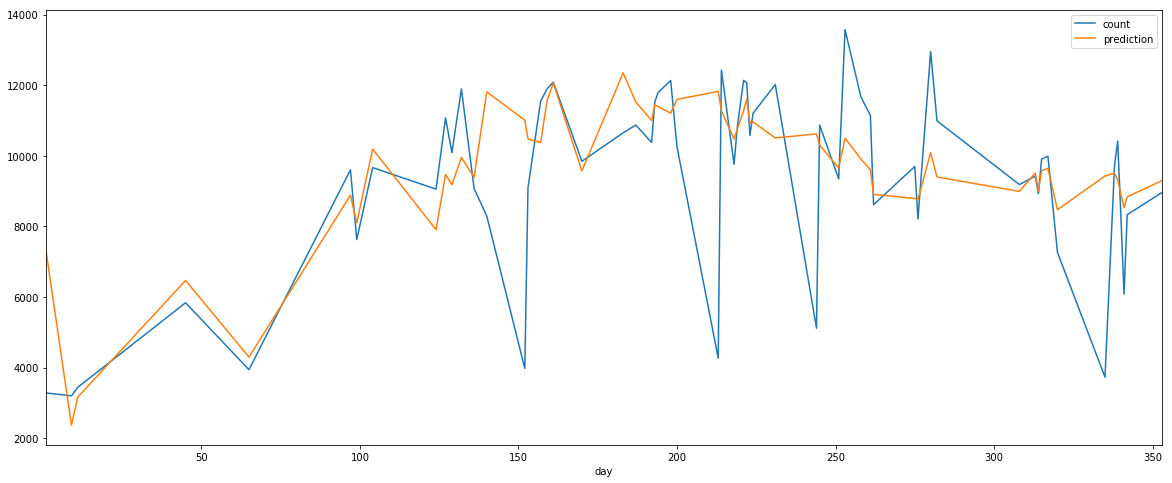

In [26]:
test_dataw[["day", "count", "prediction"]].groupby("day").aggregate(np.sum).plot(figsize=(20, 8))

In [27]:
model_resultw.named_steps["linear"].coef_

array([[  13981.76092557,   -3609.39500685,   32026.19999912,
          -7187.98097536, -221576.55048921,    -382.73112712,
         -10182.11957285]])

In [28]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,-0.006546,0.970196,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.000354,0.001134,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,0.002780,-0.003024,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.022740,0.011746,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,0.145430,0.255887,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,0.140343,0.262245,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.278011,0.203155,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,0.146631,-0.148062,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.302045,0.092957,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,0.380540,0.170805,-0.084427


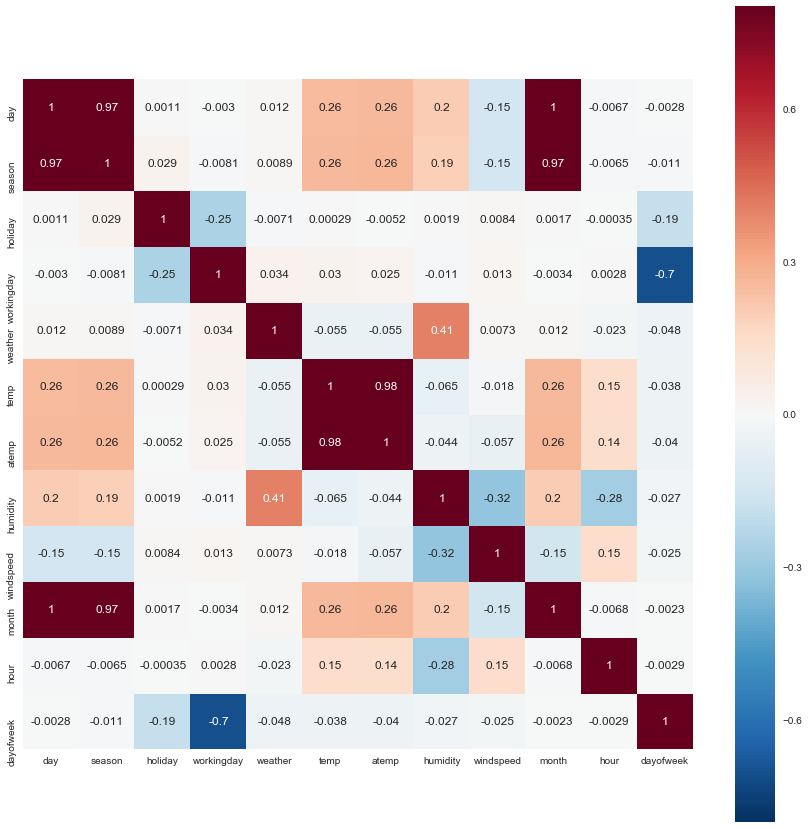

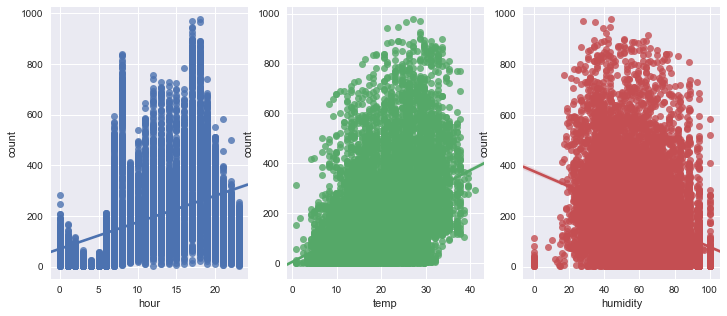

In [29]:
import seaborn as sb

correlation_matrix = data[fit_columns].corr(method='pearson')
plt.subplots(figsize = (15, 15))

sb.heatmap(correlation_matrix, vmax=.8, square=True, annot=True)
plt.show()
fig,(ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sb.regplot(x="hour", y="count", data=data, ax=ax1)
sb.regplot(x="temp", y="count", data=data, ax=ax2)
sb.regplot(x="humidity", y="count", data=data, ax=ax3)